In [196]:
!pip install git+https://github.com/logictensornetworks/LTNtorch

  Cloning https://github.com/logictensornetworks/LTNtorch to /tmp/pip-req-build-p6qsm1r6
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/LTNtorch /tmp/pip-req-build-p6qsm1r6
  Resolved https://github.com/logictensornetworks/LTNtorch to commit d1bd98169cc2121f8cdd25ff99901e4589923c95
  Preparing metadata (setup.py) ... done


In [197]:
# Reproducibility seeds
import os, random, numpy as np, torch
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
print(f"Seeds set to {seed}")

Seeds set to 42


In [198]:
import torch
import torch.nn as nn
import ltn
import numpy as np
import matplotlib.pyplot as plt

### Código para Gerar o Dataset

Este código cria a classe CLEVR_Generator e gera os vetores exatamente no formato [x, y, r, g, b, s].

In [199]:
def get_clevr_data_expanded(n_samples):
    """
    Gera um dataset CLEVR sintético estendido para regras complexas.
    Retorna tensor de formato (n_samples, 11).

    ESTRUTURA DO VETOR [11 features]:
    -------------------------------------------------
    [0, 1]    : Posição x, y (0.0 a 1.0)
    [2, 3, 4] : Cores One-Hot (Vermelho, Verde, Azul)
    [5, 6, 7, 8, 9] : Formas One-Hot (Círculo, Quadrado, Cilindro, Cone, Triângulo)
    [10]      : Tamanho (0.0 = Pequeno, 1.0 = Grande)
    -------------------------------------------------
    """
    data = []
    labels = []

    data = [[2,18,1,0,0,1,0,0,0,0,0],
            [10.5,3.5,1,0,0,0,0,0,0,1,1],
            [5.5,2.5,0,1,0,1,0,0,0,0,0],
            [2.5,4.5,1,0,0,0,0,0,1,0,1],
            [4.5,8.5,1,0,0,0,0,1,0,0,1],
            [7.1,12,0,0,1,1,0,0,0,0,0],
            [8.2,17.9,0,0,1,1,0,0,0,0,1],
            [10.4,16,0,1,0,0,0,1,0,0,0],
            [11,10,0,1,0,0,0,0,1,0,0],
            [13.7,5.2,0,1,0,0,0,0,0,1,1],
            [12,1,1,0,0,0,0,0,0,1,1,],
            [15.5,1.5,1,0,0,0,0,1,0,0,0],
            [19,2,1,0,0,0,0,0,1,0,1],
            [24,0,0,0,1,0,0,0,0,1,0],
            [23.2,7.1,0,1,0,0,0,0,1,0,1],
            [11,23,0,0,1,1,0,0,0,0,1],
            [7,17,0,1,0,1,0,0,0,0,1],
            [10,15,1,0,0,0,1,0,0,0,0],
            [13.5,14.7,0,0,1,0,0,1,0,0,1],
            [17,17,1,0,0,0,0,0,0,1,0],
            [18.5,29.5,0,1,0,0,1,0,0,0,0],
            [15,20.2,0,1,0,0,0,0,0,1,0],
            [15.5,23.5,1,0,0,1,0,0,0,0,0],
            [17.5,24.5,1,0,0,1,0,0,0,0,1],
            [15,4.5,1,0,0,0,0,0,1,0,1]]

    # Normalizar os valores de x e y
    xs = [d[0] for d in data]
    ys = [d[1] for d in data]

    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)

    # Mapeamento para labels legíveis
    shapes_names = ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
    colors_names = ["Red", "Green", "Blue"]
    sizes_names  = ["Small", "Large"]

    for d in data:
        '''# 1. Posição (x, y)
        x = np.random.rand()
        y = np.random.rand()

        # 2. Cor (One-hot 3 cores)
        color_idx = np.random.randint(0, 3)
        color_vec = [0.0] * 3
        color_vec[color_idx] = 1.0

        # 3. Forma (One-hot 5 formas)
        shape_idx = np.random.randint(0, 5)
        shape_vec = [0.0] * 5
        shape_vec[shape_idx] = 1.0

        # 4. Tamanho (Binário com ruído leve para realismo)
        # Se < 0.5 é Pequeno, se > 0.5 é Grande
        is_large = np.random.rand() > 0.5
        size_val = 1.0 if is_large else 0.0

        # Construção do Vetor
        # [x, y] + [r, g, b] + [s1...s5] + [size]
        vector = [x, y] + color_vec + shape_vec + [size_val]
        data.append(vector)'''

        # Aplica normalização em cada objeto
        d[0] = (d[0] - min_x) / (max_x - min_x) if max_x != min_x else 0.0
        d[1] = (d[1] - min_y) / (max_y - min_y) if max_y != min_y else 0.0

        # Label para debug
        desc = f"{sizes_names[int(d[10])]} {colors_names[d[2:5].index(1)]} {shapes_names[d[5:10].index(1)]} at ({d[0]:.2f}, {d[1]:.2f})"
        labels.append(desc)

    tensor_data = torch.tensor(data, dtype=torch.float32)
    return tensor_data, labels

# --- USO ---
# Gerar dados
data, texts = get_clevr_data_expanded(25)
objects = ltn.Variable("objects", data)

i =random.randint(0,24)

print(f"Dataset gerado. Shape: {data.shape}")
print(f"Exemplo: {texts[i]}")
print(f"Vetor: {data[i]}")

Dataset gerado. Shape: torch.Size([25, 11])
Exemplo: Small Green Square at (0.75, 1.00)
Vetor: tensor([0.7500, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


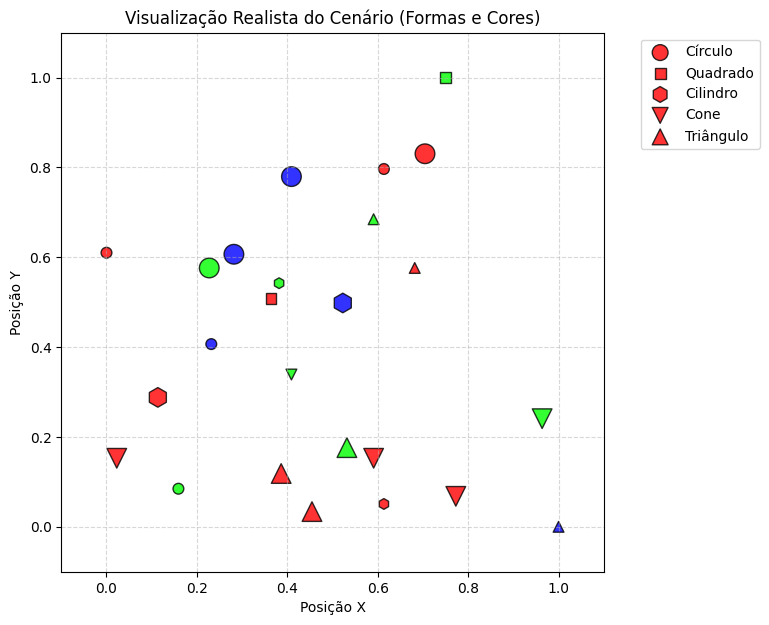

In [200]:
import matplotlib.pyplot as plt

# 2. Função para Plotar o Cenário
def plot_scenario_with_shapes(data):
    # Converter Tensor para Numpy para poder manipular
    np_data = data.detach().cpu().numpy()

    # Extrair coordenadas
    x = np_data[:, 0]
    y = np_data[:, 1]

    # Extrair Cores (RGB está nos índices 2, 3, 4)
    colors = np_data[:, 2:5]

    # Extrair Tamanhos (Índice 10)
    # Se valor > 0.5 é Grande, senão Pequeno
    raw_sizes = np_data[:, 10]
    plot_sizes = [200 if s > 0.5 else 60 for s in raw_sizes]

    # Extrair Formas (Índices 5, 6, 7, 8, 9)
    # Usamos argmax para saber qual índice é 1 (Ex: se index 5 é 1, é Círculo)
    # Ordem: ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
    shape_indices = np.argmax(np_data[:, 5:10], axis=1)

    # Mapeamento de Marcadores do Matplotlib
    # 'o' = Círculo
    # 's' = Quadrado (Square)
    # 'h' = Hexágono (Usaremos para Cilindro para diferenciar)
    # 'v' = Triângulo pra baixo (Usaremos para Cone)
    # '^' = Triângulo pra cima
    markers = ['o', 's', 'h', 'v', '^']
    shape_names = ["Círculo", "Quadrado", "Cilindro", "Cone", "Triângulo"]

    plt.figure(figsize=(7, 7))

    # Como o scatter não aceita uma lista de marcadores de uma vez,
    # fazemos um loop por cada tipo de forma para plotar em grupos.
    for i in range(5):
        # Criar uma máscara para selecionar apenas os objetos da forma 'i'
        mask = (shape_indices == i)

        if np.any(mask): # Se houver objetos dessa forma
            plt.scatter(x[mask], y[mask],
                        c=colors[mask],
                        s=np.array(plot_sizes)[mask],
                        marker=markers[i],
                        edgecolors='black',
                        label=shape_names[i],
                        alpha=0.8)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.title("Visualização Realista do Cenário (Formas e Cores)")
    plt.xlabel("Posição X")
    plt.ylabel("Posição Y")
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1)) # Legenda fora do gráfico
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Testando com seus dados atuais
plot_scenario_with_shapes(data)

In [201]:
# Configure LTNtorch to use the appropriate device
ltn.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {ltn.device}")

Using device: cpu


In [202]:
# 1. DEFINE LOGICAL CONNECTIVES AND QUANTIFIERS (REQUIRED IN LTNTORCH)
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
sat_agg = ltn.fuzzy_ops.SatAgg()

Iff = ltn.Connective(ltn.fuzzy_ops.Equiv(ltn.fuzzy_ops.AndProd(), ltn.fuzzy_ops.ImpliesReichenbach()))

In [203]:
# 2. CREATE LTN OBJECTS (Constants and Variables)
# Em vez de criar formas manuais, usamos os dados gerados no passo anterior.
# 'data' deve vir da chamada get_clevr_data_expanded(25) feita anteriormente.

# Variável que representa "Todos os objetos do universo"
objects = ltn.Variable("objects", data)

print("Variável LTN 'objects' pronta para uso nos axiomas.")

Variável LTN 'objects' pronta para uso nos axiomas.


In [204]:
# 1. DEFINIÇÃO DOS MODELOS ESPECIALIZADOS

class ColorModel(nn.Module):

    def __init__(self, color_index):
        super(ColorModel, self).__init__()
        self.color_index = color_index # Índice esperado: 0=Red, 1=Green, 2=Blue (dentro do slice)

    def forward(self, x):
        # x shape: [batch, 11]
        x = x.value if hasattr(x, 'value') else x

        # Pegamos apenas as cores (índices 2, 3, 4 do vetor original)
        # Para dados one-hot, retornar diretamente o valor (0.0 ou 1.0) evita ambiguidade de 0.5.
        features = x[..., 2:5]
        return features[..., self.color_index]


class ShapeModel(nn.Module):

    def __init__(self, shape_index):
        super(ShapeModel, self).__init__()
        self.shape_index = shape_index

    def forward(self, x):
        x = x.value if hasattr(x, 'value') else x
        # Pegamos apenas as formas (índices 5, 6, 7, 8, 9)
        # Retornar diretamente o valor one-hot (0.0 ou 1.0) para clareza lógica.
        features = x[..., 5:10]

        return features[..., self.shape_index]


class SizeModel(nn.Module):

    def __init__(self, greater_than_05=True):
        super(SizeModel, self).__init__()
        self.greater = greater_than_05

    def forward(self, x):
        x = x.value if hasattr(x, 'value') else x
        # Pegamos apenas o tamanho (índice 10)
        size_val = x[..., 10]
        if self.greater:
            # isBig (se > 0.5)
            return torch.sigmoid(20.0 * (size_val - 0.5))
        else:
            # isSmall (se <= 0.5)
            return torch.sigmoid(20.0 * (0.5 - size_val))


# Modelo espacial genérico treinável
class SpatialModel(nn.Module):

    def __init__(self):
        super(SpatialModel, self).__init__()

        # Entrada: 4 features (x1, y1, x2, y2)
        self.net = nn.Sequential(
            nn.Linear(4, 16),
            nn.ELU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        # Pega apenas posições x,y (índices 0,1)
        inputs = torch.cat([x_val[..., :2], y_val[..., :2]], dim=-1)

        return self.net(inputs).squeeze()


# MODELOS FIXOS CONFORME ENUNCIADO

class CloseToModel(nn.Module):

    """Proximidade por Kernel Gaussiano (fixo, não treinável)."""
    def __init__(self, sigma=0.1):
        super().__init__()
        self.sigma = sigma

    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        # Usa apenas posições (0,1)
        dx = x_val[..., 0] - y_val[..., 0]
        dy = x_val[..., 1] - y_val[..., 1]
        dist2 = dx*dx + dy*dy

        return torch.exp(-dist2 / (2.0 * (self.sigma ** 2)))

class SameSizeModel(nn.Module):

    """Similaridade de tamanho fixa: 1 - |size_x - size_y|."""
    def forward(self, x, y):
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y
        sx = x_val[..., 10]
        sy = y_val[..., 10]

        return 1.0 - torch.abs(sx - sy)

In [205]:
# Cores (Indices no slice 2:5 -> 0, 1, 2)
isRed   = ltn.Predicate(ColorModel(0))
isGreen = ltn.Predicate(ColorModel(1))
isBlue  = ltn.Predicate(ColorModel(2))

# Formas (Indices no slice 5:10 -> 0..4)
# Ordem gerada: ["Circle", "Square", "Cylinder", "Cone", "Triangle"]
isCircle   = ltn.Predicate(ShapeModel(0))
isSquare   = ltn.Predicate(ShapeModel(1))
isCylinder = ltn.Predicate(ShapeModel(2))
isCone     = ltn.Predicate(ShapeModel(3))
isTriangle = ltn.Predicate(ShapeModel(4))

# Tamanhos
isBig   = ltn.Predicate(SizeModel(greater_than_05=True))
isSmall = ltn.Predicate(SizeModel(greater_than_05=False))

# Espaciais (Treináveis)
leftOf  = ltn.Predicate(SpatialModel())
rightOf = ltn.Predicate(SpatialModel())
below   = ltn.Predicate(SpatialModel())
above   = ltn.Predicate(SpatialModel())

# Fixos (Matemáticos)
closeTo = ltn.Predicate(CloseToModel())
sameSize = ltn.Predicate(SameSizeModel())

In [206]:
# --- Definições Auxiliares da Tarefa 2 (Raciocínio Horizontal) ---

# 1. inBetween(x, y, z): x está entre y e z
# Fórmula: (Left(y,x) E Right(z,x)) OU (Left(z,x) E Right(y,x))
def inBetween(x, y, z):
    cond1 = And(leftOf(y, x), rightOf(z, x))
    cond2 = And(leftOf(z, x), rightOf(y, x))
    return Or(cond1, cond2)

# 2. Predicado de desigualdade para evitar auto-comparações
class NotEqualModel(nn.Module):
    def forward(self, a, b):
        a_val = a.value if hasattr(a, 'value') else a
        b_val = b.value if hasattr(b, 'value') else b
        # Verdade baixa quando todos elementos são iguais
        eq = torch.all(torch.isclose(a_val, b_val, atol=1e-6), dim=-1)
        return (~eq).float()

notEqual = ltn.Predicate(NotEqualModel())

# --- Definição Corrigida da Regra de Empilhamento (canStack) ---
def canStack(x, y):
    # Parte A: Restrição de Forma da Base (y)
    # y não pode ser Cone NEM Triângulo
    valid_base_shape = Not(Or(isCone(y), isTriangle(y)))

    # Parte B: Restrição de Equilíbrio Estável (Pedido no enunciado)
    # "forem de mesmas dimensões OU o centroide de x estiver em distância estável (CloseTo)"
    # Usamos Or para indicar que basta uma das duas ser verdade
    is_stable = Or(sameSize(x, y), closeTo(x, y))

    # Combina as duas condições: (Forma Válida) E (Estabilidade)
    return And(valid_base_shape, is_stable)


In [207]:
def axioms():
    axioms_list = []

    # TAREFA 1: TAXONOMIA (Unários)
    # Formas (Exclusividade)
    shapes = [isCircle, isSquare, isCylinder, isCone, isTriangle]
    for i in range(len(shapes)):
        for j in range(i + 1, len(shapes)):
            # Um objeto não pode ser duas formas ao mesmo tempo
            axioms_list.append(Forall(objects, Not(And(shapes[i](objects), shapes[j](objects)))))

    # Formas (Completude)
    # Deve ser pelo menos uma das formas. Usamos Or aninhados.
    axioms_list.append(Forall(objects,
        Or(isCircle(objects),
           Or(isSquare(objects),
              Or(isCylinder(objects),
                 Or(isCone(objects), isTriangle(objects)))))))

    # Cores (Exclusividade)
    colors = [isRed, isGreen, isBlue]
    for i in range(len(colors)):
        for j in range(i + 1, len(colors)):
            axioms_list.append(Forall(objects, Not(And(colors[i](objects), colors[j](objects)))))

    # Cores (Completude)
    axioms_list.append(Forall(objects,
        Or(isRed(objects),
           Or(isGreen(objects), isBlue(objects)))))

    # Tamanho
    axioms_list.append(Forall(objects, Iff(isSmall(objects), Not(isBig(objects)))))

    # VARIÁVEIS AUXILIARES PARA RELAÇÕES (Binárias)
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)
    z = ltn.Variable("z", data)

    # TAREFA 2: ESPACIAL HORIZONTAL

    # 1. Irreflexividade
    axioms_list.append(Forall(x, Not(leftOf(x, x))))

    # 2. Assimetria
    axioms_list.append(Forall([x, y],
                              Implies(leftOf(x, y), Not(leftOf(y, x)))))

    # 3. Inverso
    axioms_list.append(Forall([x, y],
                              Iff(leftOf(x, y), rightOf(y, x))))

    # 4. Transitividade
    axioms_list.append(Forall([x, y, z],
                              Implies(And(leftOf(x, y), leftOf(y, z)),
                                      leftOf(x, z))))

    # Restrição Quadrado-Círculo
    axioms_list.append(Forall([x, y],
               Implies(And(isSquare(x), isCircle(y)),
                       rightOf(x, y))))

    # TAREFA 3: ESPACIAL VERTICAL

    # Inverso Vertical
    axioms_list.append(Forall([x, y],
                              Iff(below(x, y), above(y, x))))

    # Transitividade Vertical
    axioms_list.append(Forall([x, y, z],
                              Implies(And(below(x, y), below(y, z)),
                                      below(x, z))))

    # TAREFA 4: REGRA COMPOSTA

    # Regra: Se x e y são triângulos E estão próximos, então Mesmo Tamanho
    # Correção Aplicada: And(isTriangle(x), And(isTriangle(y), closeTo(x, y)))
    # Note os parênteses extras fechando o segundo And antes da vírgula final.
    # Use And(A, And(B, C)) em vez de And(A, B, C)
    axioms_list.append(
        Forall([x, y],
              Implies(And(isTriangle(x), And(isTriangle(y), closeTo(x, y))),
                      sameSize(x, y)))
    )

    return sat_agg(*axioms_list)

In [208]:
# --- Função de Consulta Atualizada ---
def query_canStack():
    print("\n=== TAREFA 3 (EXTRA): TESTE DE EMPILHAMENTO (canStack) ===")

    # Variáveis auxiliares
    # Precisamos de x e y para testar pares
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)

    # 1. Consulta de Validação (Cilindro)
    # Testamos com (y, y) pois um objeto tem mesmo tamanho e está perto de si mesmo,
    # isolando o teste apenas para a "Forma da Base".
    # Deve dar ALTO (perto de 1.0)
    query_valid_base = Forall([y],
                              Implies(isCylinder(y), canStack(y, y)))

    print(f"1. Verificação (Se base é Cilindro, Pode?): {query_valid_base.value.item():.4f}")

    # 2. Consulta de Proibição (Cone)
    # Deve dar BAIXO (perto de 0.0), pois Cone falha na "valid_base_shape"
    query_invalid_base = Forall([y],
                                And(isCone(y), canStack(y, y)))

    print(f"2. Verificação (Se base é Cone, Pode?): {query_invalid_base.value.item():.4f}")
    print("   (Nota: Valor baixo é CORRETO, pois a regra proíbe cones na base)")

    # 3. Exemplo Existencial (Pares Distintos)
    # "Existe algum par (x, y) que pode ser empilhado?"
    query_exists = Exists([x, y],
                          canStack(x, y))

    print(f"3. Existência de qualquer par empilhável válido: {query_exists.value.item():.4f}")

def queries_task_4():
    print("\n TAREFA 4: RACIOCÍNIO COMPOSTO")

    # Variáveis auxiliares para iterar sobre o conjunto de objetos
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)
    z = ltn.Variable("z", data)

    # 1. Filtragem Composta
    # "Existe algum objeto Pequeno (x) que esteja Abaixo de um Cilindro (y)
    #  E à Esquerda de um Quadrado (z)?"

    # Nota: Exists com 1 variável não precisa de lista, pode ser direto.
    condicao_y = Exists(y, And(isCylinder(y), below(x, y)))
    condicao_z = Exists(z, And(isSquare(z), leftOf(x, z)))

    query1 = Exists(x,
                    And(isSmall(x),
                        And(condicao_y, condicao_z)))

    print(f"1. Filtragem Composta (Pequeno, Abaixo de Cilindro, Esq de Quadrado): {query1.value.item():.4f}")

    # 2. Dedução de Posição Absoluta
    # "Existe um Cone Verde que está Entre (InBetween) dois outros objetos quaisquer?"

    query2 = Exists([x, y, z],
                    And(isCone(x),
                        And(isGreen(x),
                            inBetween(x, y, z))))

    print(f"2. Dedução (Cone Verde Entre dois objetos): {query2.value.item():.4f}")

    # 3. Restrição de Proximidade
    check_rule = Forall([x, y],
               Implies(And(isTriangle(x), And(isTriangle(y), closeTo(x, y))),
                       sameSize(x, y)))
    print(f"3. Verificação da Regra (Triângulos Próximos = Mesmo Tamanho): {check_rule.value.item():.4f}")

In [209]:
# 5. SATISFIABILITY CHECKING (Reasoning)
def check_satisfiability():
    # Get the satisfaction level of our knowledge base
    sat_level = axioms()
    print(f"Knowledge base satisfaction level: {sat_level.item():.4f}")

    return sat_level


In [210]:
# 6. TRAINING THE PREDICATES (Learning from data)
def train_predicates(epochs):
    # Coletar parâmetros de todos os predicados treináveis

    parameters = []

    # Unários (Forma, Cor, Tamanho)
    unary_preds = [isCircle, isSquare, isCylinder, isCone, isTriangle, # Formas
                   isRed, isGreen, isBlue,                             # Cores
                   isSmall, isBig]                                     # Tamanhos

    for p in unary_preds:
        parameters += list(p.model.parameters())

    # Binários (Posição Espacial)
    binary_preds = [leftOf, rightOf, below, above]

    for p in binary_preds:
        parameters += list(p.model.parameters())

    # Inicializa o otimizador com essa lista gigante de parâmetros
    optimizer = torch.optim.Adam(parameters, lr=0.001)

    print("\n=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===")
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Calcula a perda baseada na satisfação dos Axiomas
        # (Quanto mais regras violadas, maior a perda)
        sat_level = axioms()
        sat_loss = 1.0 - sat_level

        # Backpropagation
        sat_loss.backward()
        optimizer.step()

        # Monitoramento
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Satisfação da KB = {sat_level.item():.4f}")


In [211]:
# 7. QUERYING THE KNOWLEDGE BASE (Inference)
def query_knowledge_base():
    print("\n=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===")

    # Variáveis para as queries
    x = ltn.Variable("x", data)
    y = ltn.Variable("y", data)

    # 1. LastOnTheLeft: Existe x tal que para todo y!=x, LeftOf(x,y)
    query_last_left = Exists([x], Forall([y], Implies(notEqual(x, y), leftOf(x, y))))
    print(f"1. 'Existe objeto mais à Esquerda' (irreflexivo): {query_last_left.value.item():.4f}")

    # 2. LastOnTheRight: Existe x tal que para todo y!=x, RightOf(x,y)
    query_last_right = Exists([x], Forall([y], Implies(notEqual(x, y), rightOf(x, y))))
    print(f"2. 'Existe objeto mais à Direita' (irreflexivo): {query_last_right.value.item():.4f}")

    # 3. "Existe um objeto à Esquerda de todos os Quadrados?" (exclui auto)
    query_existential = Exists([x], Forall([y], Implies(And(isSquare(y), notEqual(x, y)), leftOf(x, y))))
    print(f"3. Esq de todos os Quadrados (exclui auto): {query_existential.value.item():.4f}")

    # 4. Teste do inBetween com objetos reais
    np_data = data.detach().cpu().numpy()
    idx_min = np.argmin(np_data[:, 0])
    idx_max = np.argmax(np_data[:, 0])
    import random
    possiveis_meio = [i for i in range(len(data)) if i != idx_min and i != idx_max]
    idx_mid = random.choice(possiveis_meio) if possiveis_meio else 0

    obj_esq = ltn.Constant(data[idx_min])
    obj_dir = ltn.Constant(data[idx_max])
    obj_meio = ltn.Constant(data[idx_mid])

    val_between = inBetween(obj_meio, obj_esq, obj_dir)
    print(f"4. InBetween (meio entre extremos reais): {val_between.value.item():.4f}")


In [212]:
# 8. RUN THE COMPLETE EXPERIMENT (Fixed & Reset)
import torch.optim as optim

print(f"{'='*40}")
print("\n EXECUTANDO EXPERIMENTO COMPLETO (RESET TOTAL)")
print(f"{'='*40}")

# 1. RESETAR MODELOS (CRUCIAL!)
# Recriamos os predicados para zerar os pesos da memória antiga
isCircle.model = ShapeModel(0)
isSquare.model = ShapeModel(1)
isCylinder.model = ShapeModel(2)
isCone.model = ShapeModel(3)
isTriangle.model = ShapeModel(4)

isRed.model = ColorModel(0)
isGreen.model = ColorModel(1)
isBlue.model = ColorModel(2)

isSmall.model = SizeModel(False)
isBig.model = SizeModel(True)

leftOf.model = SpatialModel()
rightOf.model = SpatialModel()
below.model = SpatialModel()
above.model = SpatialModel()

# 2. TREINAMENTO
print("\n--> Iniciando Treinamento do Zero...")
train_predicates(epochs=1000)

# 3. VERIFICAÇÃO FINAL
final_sat = check_satisfiability()
print(f"\n--> Satisfação Final Pós-Treino: {final_sat.item():.4f}")

# 4. RODAR AS CONSULTAS (Agora com a rede sincronizada)
print("\n--> Executando Consultas de Raciocínio...")

if 'query_knowledge_base' in globals():
    query_knowledge_base()

# Tarefa 3 (CanStack)
query_canStack()

# Tarefa 4 (Compostas)
if 'queries_task_4' in globals():
    queries_task_4()

print(f"\n{'='*40}")
print(f"RESULTADO FINAL: {final_sat.item():.4f}")
print(f"{'='*40}")

print("\n=== KEY INSIGHTS ABOUT LTNObjects ===")
print("1. LTNObjects wrap tensors with logical meaning")
print("2. Constants represent specific entities")
print("3. Variables represent quantifiable sets")
print("4. Predicates map LTNObjects to truth values [0,1]")
print("5. Logical connectives (And, Or, Not, Implies) work on truth values")
print("6. Quantifiers (Forall, Exists) aggregate over variables")
print("7. In LTNTorch, you must explicitly define all logical connectives")
print("8. The SatAgg function combines multiple axioms into a single satisfaction score")


 EXECUTANDO EXPERIMENTO COMPLETO (RESET TOTAL)

--> Iniciando Treinamento do Zero...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8401
Epoch 50: Satisfação da KB = 0.8667
Epoch 100: Satisfação da KB = 0.9059
Epoch 150: Satisfação da KB = 0.9400
Epoch 200: Satisfação da KB = 0.9556
Epoch 250: Satisfação da KB = 0.9613
Epoch 300: Satisfação da KB = 0.9637
Epoch 350: Satisfação da KB = 0.9649
Epoch 400: Satisfação da KB = 0.9656
Epoch 450: Satisfação da KB = 0.9660
Epoch 500: Satisfação da KB = 0.9663
Epoch 550: Satisfação da KB = 0.9665
Epoch 600: Satisfação da KB = 0.9667
Epoch 650: Satisfação da KB = 0.9668
Epoch 700: Satisfação da KB = 0.9669
Epoch 750: Satisfação da KB = 0.9669
Epoch 800: Satisfação da KB = 0.9670
Epoch 850: Satisfação da KB = 0.9670
Epoch 900: Satisfação da KB = 0.9671
Epoch 950: Satisfação da KB = 0.9671
Knowledge base satisfaction level: 0.9671

--> Satisfação Final Pós-Treino: 0.9671

--> Executando Consultas de Raciocínio...

==

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_metrics(data, objects_var, predicates_dict):
    """
    Calcula métricas de classificação comparando as previsões do LTN
    com o Ground Truth extraído do tensor de dados.
    """
    # 1. Extrair Ground Truth do Tensor de Dados
    # O tensor tem formato [x, y, r, g, b, circle, square, cylinder, cone, triangle, size]
    np_data = data.detach().cpu().numpy()

    gt = {
        # Cores (índices 2, 3, 4)
        'isRed':    np_data[:, 2] == 1.0,
        'isGreen':  np_data[:, 3] == 1.0,
        'isBlue':   np_data[:, 4] == 1.0,
        # Formas (índices 5, 6, 7, 8, 9)
        'isCircle':   np_data[:, 5] == 1.0,
        'isSquare':   np_data[:, 6] == 1.0,
        'isCylinder': np_data[:, 7] == 1.0,
        'isCone':     np_data[:, 8] == 1.0,
        'isTriangle': np_data[:, 9] == 1.0,
        # Tamanho (índice 10): > 0.5 é Grande (isBig), <= 0.5 é Pequeno (isSmall)
        'isBig':    np_data[:, 10] > 0.5,
        'isSmall':  np_data[:, 10] <= 0.5
    }

    print(f"\n{'Predicado':<15} | {'Acc':<8} | {'Prec':<8} | {'Rec':<8} | {'F1':<8}")
    print("-" * 65)

    metrics_storage = {}

    for name, predicate in predicates_dict.items():
        if name not in gt:
            continue

        # 2. Obter Previsão da Rede
        # O predicado retorna probabilidade [0.0, 1.0]. Usamos 0.5 como limiar.
        predictions_prob = predicate(objects_var).value.detach().cpu().numpy()
        predictions_bin = predictions_prob > 0.5

        y_true = gt[name]

        # 3. Calcular Métricas
        acc = accuracy_score(y_true, predictions_bin)
        prec = precision_score(y_true, predictions_bin, zero_division=0)
        rec = recall_score(y_true, predictions_bin, zero_division=0)
        f1 = f1_score(y_true, predictions_bin, zero_division=0)

        metrics_storage[name] = {'acc': acc, 'f1': f1}

        print(f"{name:<15} | {acc:.4f}   | {prec:.4f}   | {rec:.4f}   | {f1:.4f}")

    return metrics_storage

# COMO USAR
# Crie o dicionário com seus predicados treinados e chame a função:
preds_dict = {
         'isRed': isRed, 'isGreen': isGreen, 'isBlue': isBlue,
     'isCircle': isCircle, 'isSquare': isSquare, 'isCylinder': isCylinder,
     'isCone': isCone, 'isTriangle': isTriangle,
     'isSmall': isSmall, 'isBig': isBig
 }
evaluate_metrics(data, objects, preds_dict)


Predicado       | Acc      | Prec     | Rec      | F1      
-----------------------------------------------------------------
isRed           | 1.0000   | 1.0000   | 1.0000   | 1.0000
isGreen         | 1.0000   | 1.0000   | 1.0000   | 1.0000
isBlue          | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCircle        | 1.0000   | 1.0000   | 1.0000   | 1.0000
isSquare        | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCylinder      | 1.0000   | 1.0000   | 1.0000   | 1.0000
isCone          | 1.0000   | 1.0000   | 1.0000   | 1.0000
isTriangle      | 1.0000   | 1.0000   | 1.0000   | 1.0000
isSmall         | 1.0000   | 1.0000   | 1.0000   | 1.0000
isBig           | 1.0000   | 1.0000   | 1.0000   | 1.0000


{'isRed': {'acc': 1.0, 'f1': 1.0},
 'isGreen': {'acc': 1.0, 'f1': 1.0},
 'isBlue': {'acc': 1.0, 'f1': 1.0},
 'isCircle': {'acc': 1.0, 'f1': 1.0},
 'isSquare': {'acc': 1.0, 'f1': 1.0},
 'isCylinder': {'acc': 1.0, 'f1': 1.0},
 'isCone': {'acc': 1.0, 'f1': 1.0},
 'isTriangle': {'acc': 1.0, 'f1': 1.0},
 'isSmall': {'acc': 1.0, 'f1': 1.0},
 'isBig': {'acc': 1.0, 'f1': 1.0}}

## Setup for Equality Experiments

In [214]:
print("\n" + "="*50)
print("EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN")
print("="*50)

# Definindo conectivos lógicos específicos para os experimentos de igualdade
# (Mantemos separados para não interferir no treino principal)
Not_eq = ltn.Connective(ltn.fuzzy_ops.NotStandard())
And_eq = ltn.Connective(ltn.fuzzy_ops.AndProd())
Or_eq = ltn.Connective(ltn.fuzzy_ops.OrProbSum())
Implies_eq = ltn.Connective(ltn.fuzzy_ops.ImpliesReichenbach())
Forall_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
Exists_eq = ltn.Quantifier(ltn.fuzzy_ops.AggregPMean(p=2), quantifier="e")
sat_agg_eq = ltn.fuzzy_ops.SatAgg()

# CRIAÇÃO DE DADOS COMPATÍVEIS COM O TRABALHO (11 Dimensões)
# Estrutura: [x, y,  r, g, b,  circle, square, cylinder, cone, triangle,  size]

# 1. Objeto Vermelho Padrão (Círculo)
vec_red1 = [0.50, 0.50,  1.0, 0.0, 0.0,  1.0, 0.0, 0.0, 0.0, 0.0,  0.5]

# 2. Objeto Vermelho "Quase Igual" (Ligeira variação na posição e no tom de vermelho)
#    Isso serve para testar se a igualdade é "Fuzzy" (flexível) ou rígida
vec_red2 = [0.51, 0.51,  0.95, 0.05, 0.0,  1.0, 0.0, 0.0, 0.0, 0.0,  0.5]

# 3. Objeto Azul (Quadrado) - Totalmente diferente
vec_blue = [0.10, 0.10,  0.0, 0.0, 1.0,  0.0, 1.0, 0.0, 0.0, 0.0,  0.5]

# 4. Objeto Verde (Triângulo)
vec_green = [0.90, 0.90,  0.0, 1.0, 0.0,  0.0, 0.0, 0.0, 0.0, 1.0,  0.8]

# Criando as Constantes LTN
# Nota: Removemos 'trainable=True' pois aqui queremos testar a lógica sobre dados fixos
red_object1 = ltn.Constant(torch.tensor(vec_red1, device=ltn.device))
red_object2 = ltn.Constant(torch.tensor(vec_red2, device=ltn.device))
blue_object = ltn.Constant(torch.tensor(vec_blue, device=ltn.device))

# Criando a Variável 'objects' para quantificação (Universo de teste da igualdade)
batch_data = torch.tensor([
    vec_red1,
    vec_red2,
    vec_blue,
    vec_green
], device=ltn.device)

objects_eq = ltn.Variable("objects_eq", batch_data)

print("Equality experiment setup complete! (Data structure adjusted to 11 features)")
print(f"Sample vector (Red1): {vec_red1}")


EXTENSION: DIFFERENT FORMS OF EQUALITY IN LTN
Equality experiment setup complete! (Data structure adjusted to 11 features)
Sample vector (Red1): [0.5, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.5]


## 1 LTN Diagonal Equality Implementation

In [215]:
print("\n" + "-"*30)
print("1. LTN DIAGONAL EQUALITY")
print("-"*30)

class DiagonalEquality(nn.Module):
    """Implements diagonal equality using LTN's diag function"""
    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Create diagonal pairs and compute similarity
        # For simplicity, we use cosine similarity on the diagonal
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)
        return 0.5 * (cos_sim + 1.0)  # Normalize to [0,1]

# Create diagonal equality predicate
Equal_Diag = ltn.Predicate(DiagonalEquality().to(ltn.device))

def axioms_withEquality_Diag():
    """Knowledge base using diagonal equality"""
    # Basic equality axioms
    axioms = [
        # Reflexivity: every object should be equal to itself
        Forall_eq(objects_eq, Equal_Diag(objects_eq, objects_eq)),

        # Symmetry example: if object1 equals object2, then object2 equals object1
        Equal_Diag(red_object1, red_object2),
        Equal_Diag(red_object2, red_object1),

        # Transitivity example (simplified)
        Implies_eq(
            And_eq(Equal_Diag(red_object1, red_object2), Equal_Diag(red_object2, red_object1)),
            Equal_Diag(red_object1, red_object1)
        ),

        # Different objects should not be equal
        Not_eq(Equal_Diag(red_object1, blue_object))
    ]

    return sat_agg_eq(*axioms)

# Test diagonal equality
print("Testing Diagonal Equality...")
sat_diag = axioms_withEquality_Diag()
print(f"Diagonal Equality KB Satisfaction: {sat_diag.item():.4f}")

# Query specific equalities
query1 = Equal_Diag(red_object1, red_object2)
query2 = Equal_Diag(red_object1, blue_object)
print(f"Q: Are the two red objects equal? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object? A: {query2.value.item():.4f}")


------------------------------
1. LTN DIAGONAL EQUALITY
------------------------------
Testing Diagonal Equality...
Diagonal Equality KB Satisfaction: 0.7450
Q: Are the two red objects equal? A: 0.9996
Q: Is red object equal to blue object? A: 0.5700


## 2 - Cosine Equality Implementation

In [216]:
class CosineEquality(nn.Module):
    """Implements cosine similarity-based equality with learnable temperature parameter"""
    def __init__(self):
        super().__init__()
        # Learnable temperature parameter to control sharpness of similarity
        self.temperature = nn.Parameter(torch.tensor(1.0, device=ltn.device))

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Compute cosine similarity
        # Funciona automaticamente para vetores de 11 dimensões
        cos_sim = torch.nn.functional.cosine_similarity(x_val, y_val, dim=-1)

        # Apply temperature scaling and normalize to [0,1] range
        # (cos + 1) / 2 joga o intervalo [-1, 1] para [0, 1]
        scaled_sim = torch.sigmoid(self.temperature * (cos_sim + 1.0) / 2.0)
        return scaled_sim

# Create cosine equality predicate
Equal_Cos = ltn.Predicate(CosineEquality().to(ltn.device))

def axioms_withEquality_Cos():
    """Knowledge base using cosine equality"""
    # Get learnable parameters (now includes temperature)
    parameters = list(Equal_Cos.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for temperature

    print("Training Cosine Equality...")
    for epoch in range(200):
        optimizer.zero_grad()

        # Same axioms as diagonal equality but with cosine predicate
        axioms = [
            Forall_eq(objects_eq, Equal_Cos(objects_eq, objects_eq)),  # Reflexivity

            Equal_Cos(red_object1, red_object2),               # Similar reds should be equal
            Equal_Cos(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Cos(red_object1, blue_object))        # Different objects not equal
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Cosine Equality Satisfaction = {sat.item():.4f}, Temp = {Equal_Cos.model.temperature.item():.4f}")

    # Return final satisfaction
    final_axioms = [
        Forall_eq(objects_eq, Equal_Cos(objects_eq, objects_eq)),
        Equal_Cos(red_object1, red_object2),
        Not_eq(Equal_Cos(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

In [217]:
print("\n" + "-"*30)
print("2. COSINE EQUALITY (FIXED)")
print("-"*30)

# Test cosine equality
sat_cos = axioms_withEquality_Cos()
print(f"Final Cosine Equality KB Satisfaction: {sat_cos.item():.4f}")

# Query specific equalities
query1 = Equal_Cos(red_object1, red_object2)
query2 = Equal_Cos(red_object1, blue_object)
print(f"Q: Are the two red objects equal (cosine)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (cosine)? A: {query2.value.item():.4f}")


------------------------------
2. COSINE EQUALITY (FIXED)
------------------------------
Training Cosine Equality...
Epoch 0: Cosine Equality Satisfaction = 0.6046, Temp = 1.1000
Epoch 50: Cosine Equality Satisfaction = 0.6152, Temp = 1.4543
Epoch 100: Cosine Equality Satisfaction = 0.6152, Temp = 1.4827
Epoch 150: Cosine Equality Satisfaction = 0.6152, Temp = 1.4821
Final Cosine Equality KB Satisfaction: 0.5687
Q: Are the two red objects equal (cosine)? A: 0.8148
Q: Is red object equal to blue object (cosine)? A: 0.6995


## 3 - Euclidean Equality Implementation


In [218]:
print("\n" + "-"*30)
print("3. EUCLIDEAN EQUALITY (FIXED)")
print("-"*30)

class EuclideanEquality(nn.Module):
    """Implements Euclidean distance-based equality with learnable gamma parameter"""
    def __init__(self):
        super().__init__()
        # Learnable gamma parameter for strictness
        self.gamma = nn.Parameter(torch.tensor(0.5, device=ltn.device))

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Compute Euclidean distance
        distance = torch.sum(torch.square(x_val - y_val), dim=-1)

        # Apply exponential decay with learnable gamma
        # A similaridade decai exponencialmente conforme a distância aumenta
        similarity = torch.exp(-self.gamma * distance)

        return similarity

# Create Euclidean equality predicate
Equal_Eucl = ltn.Predicate(EuclideanEquality().to(ltn.device))

def axioms_withEquality_Eucl():
    """Knowledge base using Euclidean equality"""
    parameters = list(Equal_Eucl.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.1)  # Higher LR for gamma

    print("Training Euclidean Equality...")
    for epoch in range(150):
        optimizer.zero_grad()

        axioms = [
            Forall_eq(objects_eq, Equal_Eucl(objects_eq, objects_eq)),  # Reflexivity

            Equal_Eucl(red_object1, red_object2),               # Similar objects
            Equal_Eucl(red_object2, red_object1),               # Symmetry
            Not_eq(Equal_Eucl(red_object1, blue_object))        # Different objects
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 30 == 0:
            print(f"Epoch {epoch}: Euclidean Equality Satisfaction = {sat.item():.4f}, Gamma = {Equal_Eucl.model.gamma.item():.4f}")

    # Final evaluation
    final_axioms = [
        Forall_eq(objects_eq, Equal_Eucl(objects_eq, objects_eq)),
        Equal_Eucl(red_object1, red_object2),
        Not_eq(Equal_Eucl(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test Euclidean equality
sat_eucl = axioms_withEquality_Eucl()
print(f"Final Euclidean Equality KB Satisfaction: {sat_eucl.item():.4f}")

# Query specific equalities
query1 = Equal_Eucl(red_object1, red_object2)
query2 = Equal_Eucl(red_object1, blue_object)
print(f"Q: Are the two red objects equal (Euclidean)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Euclidean)? A: {query2.value.item():.4f}")


------------------------------
3. EUCLIDEAN EQUALITY (FIXED)
------------------------------
Training Euclidean Equality...
Epoch 0: Euclidean Equality Satisfaction = 0.9423, Gamma = 0.6000
Epoch 30: Euclidean Equality Satisfaction = 0.9940, Gamma = 1.6158
Epoch 60: Euclidean Equality Satisfaction = 0.9944, Gamma = 1.4728
Epoch 90: Euclidean Equality Satisfaction = 0.9948, Gamma = 1.2837
Epoch 120: Euclidean Equality Satisfaction = 0.9948, Gamma = 1.2769
Final Euclidean Equality KB Satisfaction: 0.9955
Q: Are the two red objects equal (Euclidean)? A: 0.9934
Q: Is red object equal to blue object (Euclidean)? A: 0.0039


## 4 - Learnable Manifold Equality Implementation

In [219]:
print("\n" + "-"*30)
print("4. LEARNABLE MANIFOLD EQUALITY (FIXED)")
print("-"*30)

class LearnableEquality(nn.Module):
    """Implements learnable equality using neural network"""
    def __init__(self, input_dim=11):
        super(LearnableEquality, self).__init__()
        # Input dim is 2 * feature_dim because of concatenation
        self.net = nn.Sequential(
            nn.Linear(input_dim * 2, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ELU(),
            nn.Linear(32, 1),
            nn.Sigmoid()  # Critical: output must be in [0,1]
        )

    def forward(self, x, y):
        # Handle LTNObject inputs
        x_val = x.value if hasattr(x, 'value') else x
        y_val = y.value if hasattr(y, 'value') else y

        # Concatenate along the feature dimension
        # Junta os dois vetores de 11 dims em um vetor de 22 dims
        cat_inputs = torch.cat([x_val, y_val], dim=-1)
        return self.net(cat_inputs).squeeze()

# Create learnable equality predicate
Equal_Learned = ltn.Predicate(LearnableEquality(input_dim=11).to(ltn.device))

def axioms_withEquality_Learned():
    """Knowledge base using learnable manifold equality"""
    parameters = list(Equal_Learned.model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=0.01)

    print("Training Learnable Equality Network...")
    for epoch in range(300):
        optimizer.zero_grad()

        # Complex equality axioms that require learning
        axioms = [
            # Reflexivity: every object equals itself
            Forall_eq(objects_eq, Equal_Learned(objects_eq, objects_eq)),

            # Similar objects should be equal (red objects)
            Equal_Learned(red_object1, red_object2),
            Equal_Learned(red_object2, red_object1),

            # Different objects should not be equal
            Not_eq(Equal_Learned(red_object1, blue_object)),
            Not_eq(Equal_Learned(blue_object, red_object1)),

            # Transitivity example (if A=B and B=C then A=C)
            Implies_eq(
                And_eq(Equal_Learned(red_object1, red_object2), Equal_Learned(red_object2, red_object1)),
                Equal_Learned(red_object1, red_object1)
            )
        ]

        sat = sat_agg_eq(*axioms)
        loss = 1 - sat
        loss.backward()
        optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Learnable Equality Satisfaction = {sat.item():.4f}")

    # Final evaluation with more complex queries
    final_axioms = [
        Forall_eq(objects_eq, Equal_Learned(objects_eq, objects_eq)),
        Equal_Learned(red_object1, red_object2),
        Not_eq(Equal_Learned(red_object1, blue_object))
    ]
    return sat_agg_eq(*final_axioms)

# Test learnable equality
sat_learned = axioms_withEquality_Learned()
print(f"Final Learnable Equality KB Satisfaction: {sat_learned.item():.4f}")

# Query specific equalities
query1 = Equal_Learned(red_object1, red_object2)
query2 = Equal_Learned(red_object1, blue_object)
query3 = Equal_Learned(red_object1, red_object1)  # Reflexivity check

print(f"Q: Are the two red objects equal (Learned)? A: {query1.value.item():.4f}")
print(f"Q: Is red object equal to blue object (Learned)? A: {query2.value.item():.4f}")
print(f"Q: Is red object equal to itself (Learned)? A: {query3.value.item():.4f}")


------------------------------
4. LEARNABLE MANIFOLD EQUALITY (FIXED)
------------------------------
Training Learnable Equality Network...
Epoch 0: Learnable Equality Satisfaction = 0.5393
Epoch 50: Learnable Equality Satisfaction = 0.7959
Epoch 100: Learnable Equality Satisfaction = 0.7959
Epoch 150: Learnable Equality Satisfaction = 0.7959
Epoch 200: Learnable Equality Satisfaction = 0.7959
Epoch 250: Learnable Equality Satisfaction = 0.7959
Final Learnable Equality KB Satisfaction: 0.7113
Q: Are the two red objects equal (Learned)? A: 1.0000
Q: Is red object equal to blue object (Learned)? A: 0.0000
Q: Is red object equal to itself (Learned)? A: 1.0000


In [220]:
print(data[20])

tensor([0.7500, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


In [221]:
def init_predicates():
    #Reinicializa tudo
    global isRed, isGreen, isBlue
    global isCircle, isSquare
    global isCylinder, isCone, isTriangle
    global isSmall, isBig
    global leftOf, rightOf, below, above

    # Cores
    isRed   = ltn.Predicate(ColorModel(0))
    isGreen = ltn.Predicate(ColorModel(1))
    isBlue  = ltn.Predicate(ColorModel(2))

    # Formas
    isCircle   = ltn.Predicate(ShapeModel(0))
    isSquare   = ltn.Predicate(ShapeModel(1))
    isCylinder = ltn.Predicate(ShapeModel(2))
    isCone     = ltn.Predicate(ShapeModel(3))
    isTriangle = ltn.Predicate(ShapeModel(4))

    # Tamanho
    isBig   = ltn.Predicate(SizeModel(greater_than_05=True))
    isSmall = ltn.Predicate(SizeModel(greater_than_05=False))

    # Espaciais
    leftOf  = ltn.Predicate(SpatialModel())
    rightOf = ltn.Predicate(SpatialModel())
    below   = ltn.Predicate(SpatialModel())
    above   = ltn.Predicate(SpatialModel())


In [222]:
# =========================================
# EXPERIMENTO: REPETIÇÃO 5 VEZES
# =========================================

all_results = []

In [225]:
def aleatorizar_dataset(data):
  for d in data:
    # 1. Posição (x, y)
    d[0] = random.random()
    d[1] = random.random()

    # 2. Cor (One-hot 3 cores)
    color_idx = random.randint(0, 2)
    color_vec = [0.0] * 3
    color_vec[color_idx] = 1.0
    d[2] = color_vec[0]
    d[3] = color_vec[1]
    d[4] = color_vec[2]

    # 3. Forma (One-hot 5 formas)
    shape_idx = random.randint(0, 4)
    shape_vec = [0.0] * 5
    shape_vec[shape_idx] = 1.0
    d[5] = shape_vec[0]
    d[6] = shape_vec[1]
    d[7] = shape_vec[2]
    d[8] = shape_vec[3]
    d[9] = shape_vec[4]

    # 4. Tamanho (Binário com ruído leve para realismo)
    # Se < 0.5 é Pequeno, se > 0.5 é Grande
    is_large = random.random() > 0.5
    size_val = 1.0 if is_large else 0.0
    d[10] = size_val

    return data


EXECUÇÃO 1

--> Cenário gerado:


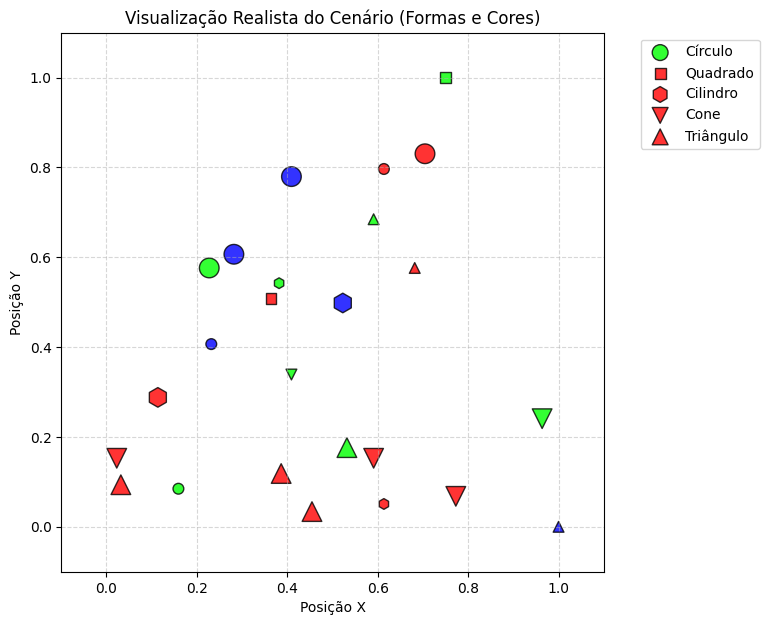


--> Satisfatibilidade inicial:
Knowledge base satisfaction level: 0.8262

--> Treinando...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8262
Epoch 50: Satisfação da KB = 0.8526
Epoch 100: Satisfação da KB = 0.8832
Epoch 150: Satisfação da KB = 0.9283
Epoch 200: Satisfação da KB = 0.9527
Epoch 250: Satisfação da KB = 0.9614
Epoch 300: Satisfação da KB = 0.9648
Epoch 350: Satisfação da KB = 0.9664
Epoch 400: Satisfação da KB = 0.9673
Epoch 450: Satisfação da KB = 0.9678
Epoch 500: Satisfação da KB = 0.9682
Epoch 550: Satisfação da KB = 0.9684
Epoch 600: Satisfação da KB = 0.9686
Epoch 650: Satisfação da KB = 0.9687
Epoch 700: Satisfação da KB = 0.9688
Epoch 750: Satisfação da KB = 0.9689

--> Satisfatibilidade final:
Knowledge base satisfaction level: 0.9690

--> 4. Executando Consultas de Raciocínio...

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. 'Existe objeto mais à Esquerda' (irreflexivo): 0.0291
2. 'Existe objeto mais à Direita' (irrefle

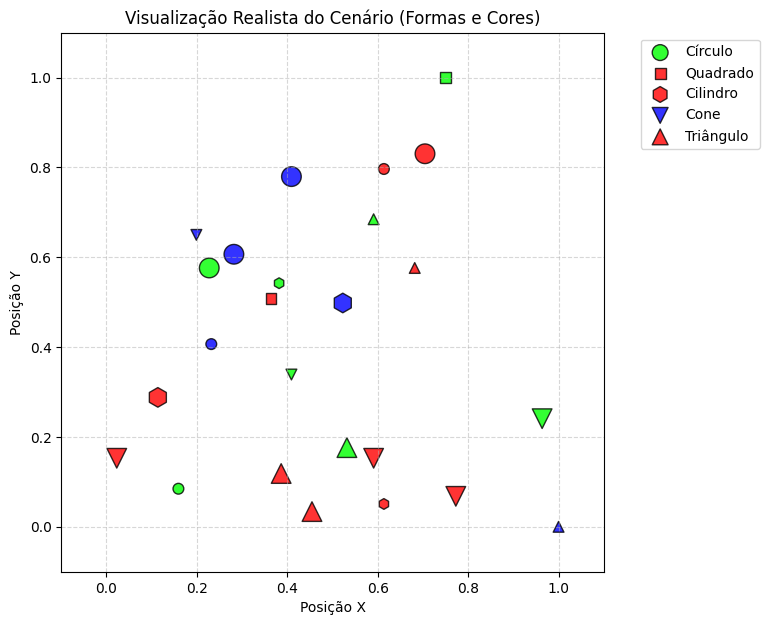


--> Satisfatibilidade inicial:
Knowledge base satisfaction level: 0.8298

--> Treinando...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8298
Epoch 50: Satisfação da KB = 0.8547
Epoch 100: Satisfação da KB = 0.8785
Epoch 150: Satisfação da KB = 0.9144
Epoch 200: Satisfação da KB = 0.9477
Epoch 250: Satisfação da KB = 0.9603
Epoch 300: Satisfação da KB = 0.9646
Epoch 350: Satisfação da KB = 0.9664
Epoch 400: Satisfação da KB = 0.9673
Epoch 450: Satisfação da KB = 0.9679
Epoch 500: Satisfação da KB = 0.9683
Epoch 550: Satisfação da KB = 0.9685
Epoch 600: Satisfação da KB = 0.9687
Epoch 650: Satisfação da KB = 0.9688
Epoch 700: Satisfação da KB = 0.9689
Epoch 750: Satisfação da KB = 0.9690

--> Satisfatibilidade final:
Knowledge base satisfaction level: 0.9690

--> 4. Executando Consultas de Raciocínio...

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. 'Existe objeto mais à Esquerda' (irreflexivo): 0.0259
2. 'Existe objeto mais à Direita' (irrefle

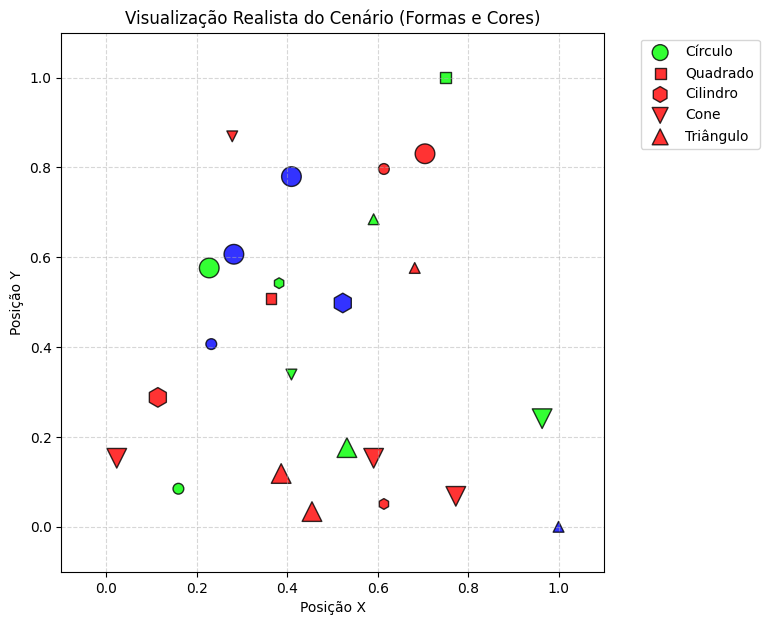


--> Satisfatibilidade inicial:
Knowledge base satisfaction level: 0.8236

--> Treinando...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8236
Epoch 50: Satisfação da KB = 0.8528
Epoch 100: Satisfação da KB = 0.8958
Epoch 150: Satisfação da KB = 0.9364
Epoch 200: Satisfação da KB = 0.9555
Epoch 250: Satisfação da KB = 0.9626
Epoch 300: Satisfação da KB = 0.9654
Epoch 350: Satisfação da KB = 0.9668
Epoch 400: Satisfação da KB = 0.9676
Epoch 450: Satisfação da KB = 0.9681
Epoch 500: Satisfação da KB = 0.9684
Epoch 550: Satisfação da KB = 0.9686
Epoch 600: Satisfação da KB = 0.9688
Epoch 650: Satisfação da KB = 0.9689
Epoch 700: Satisfação da KB = 0.9690
Epoch 750: Satisfação da KB = 0.9690

--> Satisfatibilidade final:
Knowledge base satisfaction level: 0.9691

--> 4. Executando Consultas de Raciocínio...

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. 'Existe objeto mais à Esquerda' (irreflexivo): 0.0273
2. 'Existe objeto mais à Direita' (irrefle

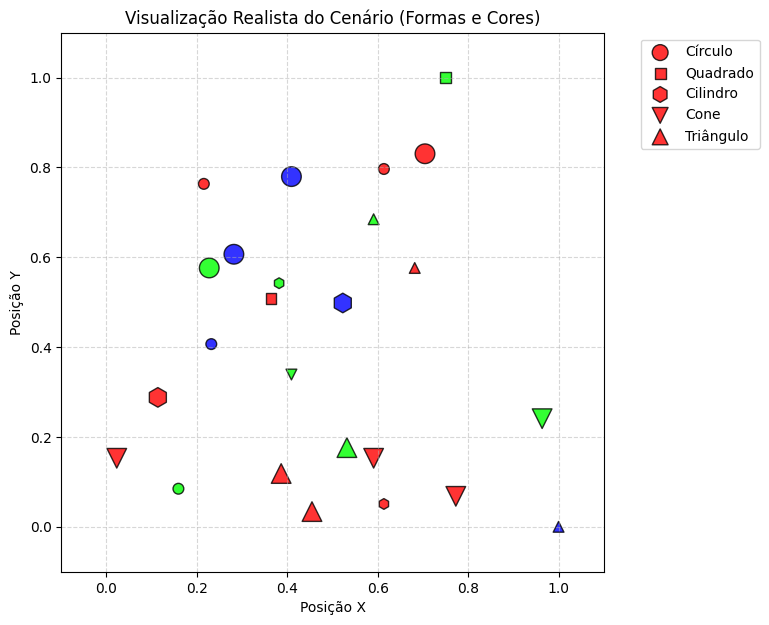


--> Satisfatibilidade inicial:
Knowledge base satisfaction level: 0.8346

--> Treinando...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8346
Epoch 50: Satisfação da KB = 0.8624
Epoch 100: Satisfação da KB = 0.9045
Epoch 150: Satisfação da KB = 0.9394
Epoch 200: Satisfação da KB = 0.9553
Epoch 250: Satisfação da KB = 0.9612
Epoch 300: Satisfação da KB = 0.9637
Epoch 350: Satisfação da KB = 0.9649
Epoch 400: Satisfação da KB = 0.9656
Epoch 450: Satisfação da KB = 0.9660
Epoch 500: Satisfação da KB = 0.9663
Epoch 550: Satisfação da KB = 0.9665
Epoch 600: Satisfação da KB = 0.9667
Epoch 650: Satisfação da KB = 0.9668
Epoch 700: Satisfação da KB = 0.9669
Epoch 750: Satisfação da KB = 0.9669

--> Satisfatibilidade final:
Knowledge base satisfaction level: 0.9670

--> 4. Executando Consultas de Raciocínio...

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. 'Existe objeto mais à Esquerda' (irreflexivo): 0.0286
2. 'Existe objeto mais à Direita' (irrefle

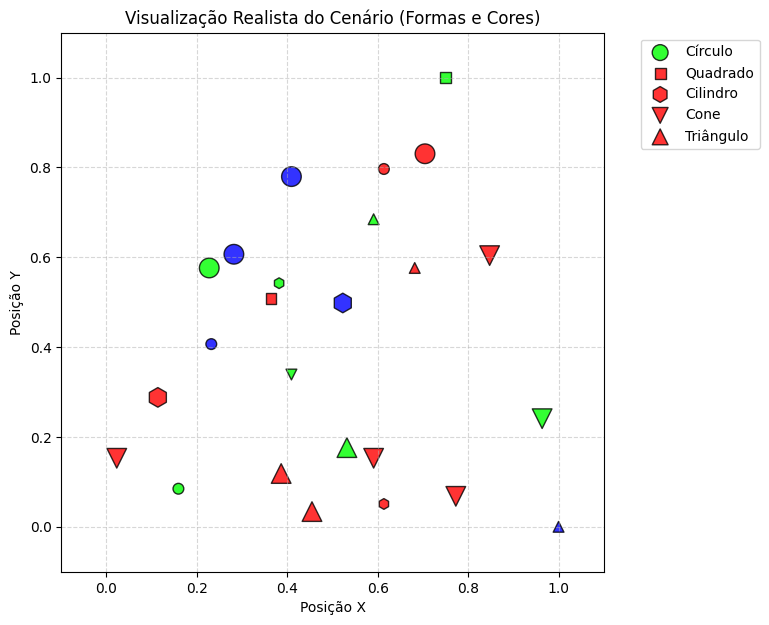


--> Satisfatibilidade inicial:
Knowledge base satisfaction level: 0.8050

--> Treinando...

=== TREINANDO PREDICADOS (NEURO-SIMBÓLICO) ===
Epoch 0: Satisfação da KB = 0.8050
Epoch 50: Satisfação da KB = 0.8360
Epoch 100: Satisfação da KB = 0.8691
Epoch 150: Satisfação da KB = 0.9073
Epoch 200: Satisfação da KB = 0.9412
Epoch 250: Satisfação da KB = 0.9573
Epoch 300: Satisfação da KB = 0.9632
Epoch 350: Satisfação da KB = 0.9657
Epoch 400: Satisfação da KB = 0.9669
Epoch 450: Satisfação da KB = 0.9676
Epoch 500: Satisfação da KB = 0.9681
Epoch 550: Satisfação da KB = 0.9683
Epoch 600: Satisfação da KB = 0.9686
Epoch 650: Satisfação da KB = 0.9687
Epoch 700: Satisfação da KB = 0.9688
Epoch 750: Satisfação da KB = 0.9689

--> Satisfatibilidade final:
Knowledge base satisfaction level: 0.9690

--> 4. Executando Consultas de Raciocínio...

=== TAREFA 2: CONSULTAS DE RACIOCÍNIO HORIZONTAL ===
1. 'Existe objeto mais à Esquerda' (irreflexivo): 0.0291
2. 'Existe objeto mais à Direita' (irrefle

In [226]:
for run in range(1, 6):
    init_predicates()
    print(f"\n{'='*60}")
    print(f"EXECUÇÃO {run}")
    print(f"{'='*60}")

    # 1. Gerar NOVO dataset
    data = aleatorizar_dataset(data)
    objects = ltn.Variable("objects", data)

    # 2. Atualizar variáveis globais usadas no notebook
    globals()['data'] = data
    globals()['objects'] = objects

    # 3. Plotar o cenário DESTA execução
    print("\n--> Cenário gerado:")
    plot_scenario_with_shapes(data)   # <<<<< usa a função ORIGINAL do notebook

    # 4. Satisfatibilidade inicial
    print("\n--> Satisfatibilidade inicial:")
    sat_before = check_satisfiability()

    # 5. Treinamento
    print("\n--> Treinando...")
    train_predicates(epochs=800)

    # 6. Satisfatibilidade final
    print("\n--> Satisfatibilidade final:")
    sat_after = check_satisfiability()

    # 7. Consultas (Queries)
    print("\n--> 4. Executando Consultas de Raciocínio...")

    if 'query_knowledge_base' in globals():
        query_knowledge_base()
    else:
        print("Aviso: Função 'query_knowledge_base' não encontrada.")

    # Tenta rodar as consultas da Tarefa 3 (Compostas/Restrições)
    query_canStack()

    if 'queries_task_4' in globals():
        queries_task_4()
    else:
        print("Aviso: Função 'queries_task_4' não encontrada.")

    # 8. Métricas
    preds_dict = {
        'isRed': isRed, 'isGreen': isGreen, 'isBlue': isBlue,
        'isCircle': isCircle, 'isSquare': isSquare,
        'isCylinder': isCylinder, 'isCone': isCone,
        'isTriangle': isTriangle, 'isSmall': isSmall, 'isBig': isBig
    }

    metrics = evaluate_metrics(data, objects, preds_dict)

    # 9. Guardar resultados
    all_results.append({
        'run': run,
        'sat_before': sat_before.item(),
        'sat_after': sat_after.item(),
        'metrics': metrics
    })


In [227]:
print("\n" + "="*70)
print("RESUMO FINAL DAS 5 EXECUÇÕES")
print("="*70)

for res in all_results:
    print(f"\nExecução {res['run']}")
    print(f"  Sat antes do treino : {res['sat_before']:.4f}")
    print(f"  Sat após o treino  : {res['sat_after']:.4f}")

    accs = [v['acc'] for v in res['metrics'].values()]
    f1s  = [v['f1']  for v in res['metrics'].values()]

    print(f"  Acurácia média     : {sum(accs)/len(accs):.4f}")
    print(f"  F1-score médio     : {sum(f1s)/len(f1s):.4f}")


RESUMO FINAL DAS 5 EXECUÇÕES

Execução 1
  Sat antes do treino : 0.8115
  Sat após o treino  : 0.9626
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 1
  Sat antes do treino : 0.8262
  Sat após o treino  : 0.9690
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 2
  Sat antes do treino : 0.8298
  Sat após o treino  : 0.9690
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 3
  Sat antes do treino : 0.8236
  Sat após o treino  : 0.9691
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 4
  Sat antes do treino : 0.8346
  Sat após o treino  : 0.9670
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000

Execução 5
  Sat antes do treino : 0.8050
  Sat após o treino  : 0.9690
  Acurácia média     : 1.0000
  F1-score médio     : 1.0000
